In [ ]:
#Using this library to import the data
import yfinance as yf

#Using this library for sentiment analysis
from transformers import pipeline

#Using this library to plot graphs
import matplotlib.pyplot as plt

#Used this library additionally to increase interpretability of the sentiment analysis - by using a dataframe
import pandas as pd

#Used numpy for using the .arrange method
import numpy as np

**Creating new Functions:**

Function get_stock_data

Function plot_stock_trend

Function plot_daily_returns

Function plot_cumulative_returns

Function - insights_stock_trend

Function - cal_returns

In [ ]:
#Function - cal_returns
def calc_returns(prices):
    #Initializing an empty list to store the returns
    returns = []
    for i in range(1, len(prices)):
        #Calculating the rate of return and adding it to a list - 'returns'
        r = (prices[i] / prices[i-1]) - 1
        r_rounded = round(r, 2)  #Using round function to round the return to 2 decimal places
        returns.append(r_rounded)
    return returns

In [ ]:
def get_stock_data(ticker_symbol, start_date, end_date):
    """
    This function fetches the historical stock data for a given ticker symbol between a start and end date.
    It uses the ytfinance library to get the stock data.

    Arguments:
    - ticker_symbol (str): The stock's ticker symbol.
    - start_date (str): The start date in 'YYYY-MM-DD' format.
    - end_date (str): The end date in 'YYYY-MM-DD' format.

    Returns:
    - pandas.DataFrame: Stock data including open, close, high, low, volume.
    """
    #Using the yfinance library to create a Ticker object for the given stock ticker symbol
    ticker_data = yf.Ticker(ticker_symbol)
    #Using History method of the ticker object to get the historical stock data
    stock_data = ticker_data.history(start=start_date, end=end_date)
    return stock_data

In [ ]:
def plot_stock_trend(dates, closing_prices):
    """
    This function plots the trend of the stock's closing price for the given dates.
    This tells us how the stock price moved in the given timeframe.

    Arguments:
    - dates (pandas.DatetimeIndex): Dates corresponding to the closing prices.
    - closing_prices (list): List of closing prices for the stock.
    """
    plt.figure(figsize=(12, 6))
    #Plotting  the closing prices against the dates
    #'marker' - each data point should be marked with a circle
    #'linestyle' - the style of the line is a solid line
    #'color' - the color of both the line and markers - blue
    plt.plot(dates, closing_prices, marker='o', linestyle='-', color='steelblue')
    plt.title('Stock Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (in $)')
    #Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)
    #Enbabling grid lines for better understanding of the data points
    plt.grid(True)
    plt.show()

In [ ]:
def plot_daily_returns(dates, daily_returns):
    """
    This function plots the daily returns of the stock in a given time, which helps us understand the daily performance of the stock.
    The daily returns are calculated as the percentage change in closing price from one day to the next.

    Arguments:
    - dates (pandas.DatetimeIndex): Dates corresponding to the daily returns.
    - daily_returns (list): List of daily returns calculated from the stock prices.
    """
    plt.figure(figsize=(12, 6))
    #Skipping the first date because daily returns start from the second day (no return on the first day)
    plt.plot(dates[1:], daily_returns, marker='o', linestyle='-', color='red')
    plt.title('Daily Returns Trend')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [ ]:
def plot_cumulative_returns(dates, stock_returns):
    """
    This function plots the cumulative returns of the stock in a given time, which tells us the overall return performance of the stock in the given timeframe.
    The cumulative returns are calculated by summing up all daily returns up to each point in time which tells us the total return over the timeframe.

    Arguments:
    - dates (pandas.DatetimeIndex): Dates corresponding to the stock returns.
    - stock_returns (list): List of stock returns to calculate cumulative returns from.
    """
    #Creating a new list where each element is the total return up to that date
    cumulative_returns = [sum(stock_returns[:i+1]) for i in range(len(stock_returns))]
    plt.figure(figsize=(12, 6))
    #Plotting by skipping the first date since cumulative returns start calculating from the second day
    plt.plot(dates[1:], cumulative_returns, marker='o', linestyle='-', color='green')
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [ ]:
def insights_stock_trend(closing_prices, stock_returns):
    """
    This function is automated to give us the basic trends of the stock in a given timeframe
    (Trend of price change,  Consistency in daily returns and Identifying largest gain and drop in a day).

    Arguments:
    - closing_prices (list): List of closing stock prices.
    - stock_returns (list): List of stock returns.

    Returns:
    - str: Insights on the stock's price trend, return consistency, and significant daily changes.
    """

    #Initializing the insights variable as an empty string
    insights = ""

    #Trend of price change over the given period
    price_change_percentage = ((closing_prices[-1] - closing_prices[0]) / closing_prices[0]) * 100
    if price_change_percentage > 0:
        insights += f"The stock price increased by {price_change_percentage:.2f}% over the period.\n"
    elif price_change_percentage < 0:
        insights += f"The stock price decreased by {price_change_percentage:.2f}% over the period.\n"
    else:
        insights += "The stock price remained the same over the period.\n"

    #Consistency trend in daily returns
    positive_days = sum(1 for r in stock_returns if r > 0)
    negative_days = sum(1 for r in stock_returns if r < 0)
    if all(r > 0 for r in stock_returns):
        insights += "The stock showed a consistently positive return every day over the period.\n"
    elif all(r < 0 for r in stock_returns):
        insights += "The stock showed a consistently negative return every day over the period.\n"
    else:
        insights += f"The stock returns varied, with {positive_days} days of positive returns and {negative_days} days of negative returns over the period.\n"

    #Identifying largest gain and drop in a day
    max_gain = max(stock_returns)
    max_drop = min(stock_returns)
    insights += f"The largest single-day gain was {max_gain:.2f}%, while the largest single-day drop was {max_drop:.2f}%.\n"
    return insights

**Chosen company - Bank of America Corporation (BAC)**

In [ ]:
#Parameters decided (Using BAC ticker symbol)
ticker_symbol = "BAC"
start_date = "2023-05-01"
end_date = "2023-05-14"

#Getting stock data for the given ticker symbol and date range
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

In [ ]:
#Checking the first 5 rows of the data fetched
stock_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-01 00:00:00-04:00,28.236404,28.274691,27.757821,27.796108,34076800,0.0,0.0
2023-05-02 00:00:00-04:00,27.614245,27.623817,26.523075,26.953800,70797700,0.0,0.0
2023-05-03 00:00:00-04:00,26.953800,27.279237,26.618791,26.666651,51139500,0.0,0.0
2023-05-04 00:00:00-04:00,26.398646,26.618794,25.680771,25.833918,82173800,0.0,0.0
2023-05-05 00:00:00-04:00,26.436932,26.695365,26.293355,26.523075,50050100,0.0,0.0


In [ ]:
#Getting the closing prices from the stock data
closing_prices = stock_data['Close'].tolist()
#Calculating daily returns from the closing prices
stock_returns = calc_returns(closing_prices)

**Printing the relevant results within the specified period**

In [ ]:
#Printing the closing prices for each day within the specified period
print("Closing Prices (in $):")
for date, price in zip(stock_data.index, closing_prices):
    print(f"{date.date()}: {price:.2f}")

Closing Prices (in $):
2023-05-01: 27.80
2023-05-02: 26.95
2023-05-03: 26.67
2023-05-04: 25.83
2023-05-05: 26.52
2023-05-08: 26.50
2023-05-09: 26.48
2023-05-10: 26.15
2023-05-11: 26.22
2023-05-12: 25.93


In [ ]:
#Printting the daily return percentages for each period between the specified dates
print("\nReturns:")
for i, return_value in enumerate(stock_returns):
    print(f"Period {i+1}: {return_value:.2%}")


Returns:
Period 1: -3.00%
Period 2: -1.00%
Period 3: -3.00%
Period 4: 3.00%
Period 5: -0.00%
Period 6: -0.00%
Period 7: -1.00%
Period 8: 0.00%
Period 9: -1.00%


In [ ]:
#Printing basic insights based on the trend of closing prices and stock returns
print("\nBasic Insights:")
print(insights_stock_trend(closing_prices, stock_returns))


Basic Insights:
The stock price decreased by -6.71% over the period.
The stock returns varied, with 1 days of positive returns and 5 days of negative returns over the period.
The largest single-day gain was 0.03%, while the largest single-day drop was -0.03%.



**Visual representation of the results**

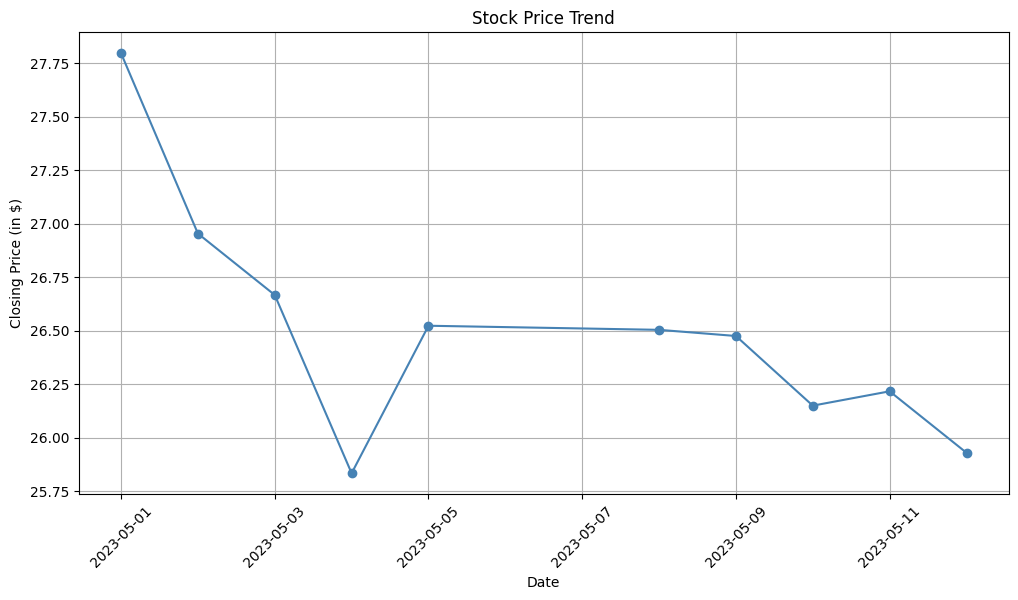

In [ ]:
#Plotting the trend of stock closing prices over time
dates = stock_data.index
plot_stock_trend(dates, closing_prices)

Stock Price Trend: The graph shows a dcreasing trend in the stock's closing prices over the given period. This could indicate the bearish (falling prices trend) market for BAC in the given period. There's a dip in prices but increased a bit before decreasing gradually, could indicate some volatility.

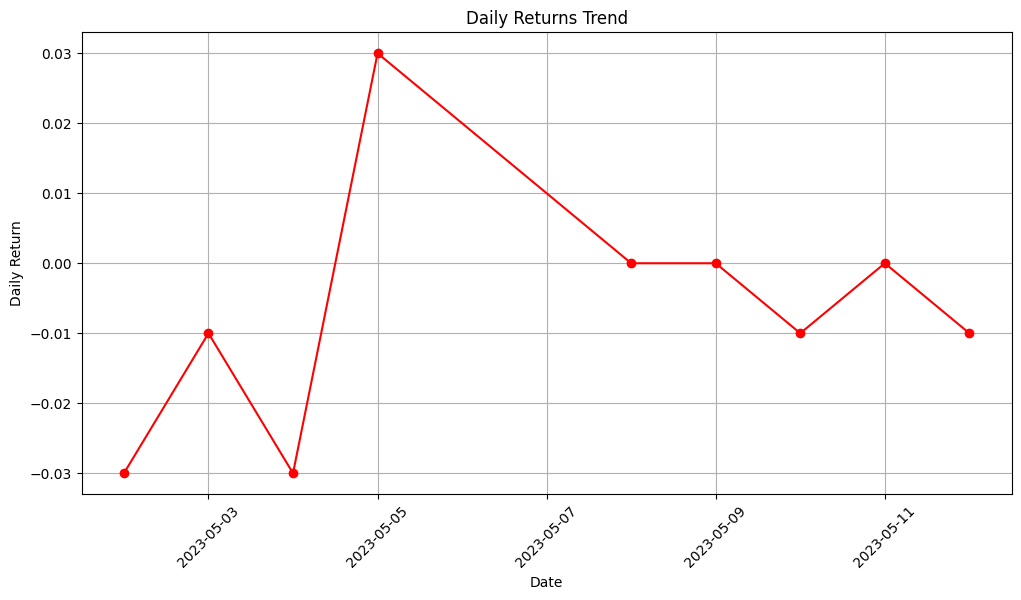

In [ ]:
#Plotting the daily returns to see their variability over the given period
plot_daily_returns(dates, stock_returns)

Daily Returns Trend: The graph which displays the daily returns fluctuates above and below zero during the given timeframe. The stock had positive and negative returns on different days, exactly how a stock market behaviour is. The spike on the second day (where the daily return was above 3%) which was followed by a decline (return around -3%), shows high level volatility again.

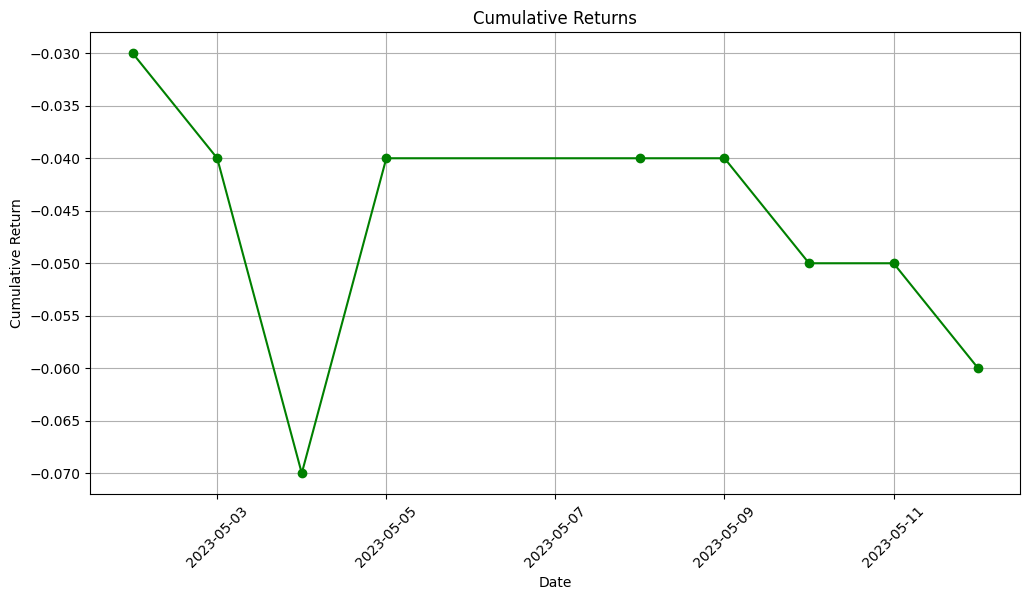

In [ ]:
#Plot the cumulative returns to show the total percentage gain or loss over the period
plot_cumulative_returns(dates, stock_returns)

Cumulative Returns: The graph shows the cumulative returns, which gives us an aggregate measure of the stock's performance over the period. It clearly shows a negative trend overall, telling us that the stock lost value over the timeframe which I chose to analyse.

**Analysis**

Creating new Functions:

Function print_data_and_insights

Function plot_data

Function calc_simple_moving_average


In [ ]:
#Function - calc_simple_moving_average
def calc_simple_moving_average(prices, window_size):
    averages = []
    #Looping through the list of prices based on the window size
    for i in range(len(prices) - window_size + 1):
        #Calculating the average for the current window and adding to the list
        window_average = sum(prices[i:i+window_size]) / window_size
        rounded_average = round(window_average, 2)  #Rounding to 2 decimal places
        averages.append(rounded_average)
    return averages

In [ ]:
def print_data_and_insights(dates, prices, sma):
    """
    Prints stock prices, SMA values and provides an analysis of trends.

    Arguments:
    - dates: List of dates corresponding to the stock prices.
    - prices: List of stock prices.
    - sma: List of SMA values.
    """
    #Formatting for better readability
    print("{:<15} {:<10} {:<10}".format("Date", "Price", "SMA"))
    #Going through the SMA list to print each date, price and SMA in a formatted manner
    for i in range(len(sma)):
        date_str = dates[i+window-1].strftime('%Y-%m-%d')
        print(f"{date_str:<15} {prices[i+window-1]:<10.2f} {sma[i]:<10.2f}")

    #Calculating the price change between the last two days
    price_change = prices[-1] - prices[-2]
    #Determining the direction of the change (increase or decrease)
    direction = "increased" if price_change > 0 else "decreased"
    #Calculating the magnitude of the change as a percentage
    magnitude = abs(price_change / prices[-2] * 100)

    trend = ""
    #Adding insights
    if prices[-1] > sma[-1]:
        trend += "an upward trend, since the latest price is above the SMA.\n"
    elif prices[-1] < sma[-1]:
        trend += "a downward trend, since the latest price is below the SMA.\n"
    else:
        trend += "stable, since the latest price is equal to the SMA.\n"

    trend += f"The price has {direction} by {magnitude:.2f}% from the previous day.\n"

    #Identifying the recent peak and trough within the window
    recent_peak = max(prices[-window:])
    recent_trough = min(prices[-window:])
    #Adding insights
    if prices[-1] == recent_peak:
        trend += "It's currently at a recent high. "
    elif prices[-1] == recent_trough:
        trend += "It's currently at a recent low. "
    else:
        #Calculating the percentage distance to the recent peak and trough for further insights
        distance_to_peak = (recent_peak - prices[-1]) / prices[-1] * 100
        distance_to_trough = (prices[-1] - recent_trough) / recent_trough * 100
        trend += f"It's {distance_to_peak:.2f}% below the recent peak and {distance_to_trough:.2f}% above the recent trough. "

    print(f"\nBasic Insights:\nThe stock is showing {trend}\n")

In [ ]:
def plot_data(dates, prices, sma, window):
    """
    Plots stock prices and their Simple Moving Average on the same chart.

    Arguments:
    - dates: List of dates corresponding to the stock prices.
    - prices: List of stock prices.
    - sma: List of SMA values.
    - window: The window size used for the SMA.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, label='Stock Price', color='steelblue', marker='o')
    sma_dates = dates[window-1:]  #Adjusting dates to match the SMA length
    plt.plot(sma_dates, sma, label=f'{window}-Day SMA', color='orangered', marker='o')
    plt.title('Stock Prices and Simple Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

**Printing the results**

In [ ]:
#Parameters decided
ticker = "BAC"
start_date = "2023-04-01"
end_date = "2023-06-01"
window = 14

#Fetching data and calculations
stock_data = get_stock_data(ticker, start_date, end_date)
closing_prices = stock_data['Close'].tolist()
sma_values = calc_simple_moving_average(closing_prices, window)

#Printing data
print_data_and_insights(stock_data.index, closing_prices, sma_values)

Date            Price      SMA       
2023-04-21      28.59      27.76     
2023-04-24      28.49      27.84     
2023-04-25      27.60      27.90     
2023-04-26      27.22      27.95     
2023-04-27      27.65      28.02     
2023-04-28      28.03      28.12     
2023-05-01      27.80      28.14     
2023-05-02      26.95      28.12     
2023-05-03      26.67      28.07     
2023-05-04      25.83      27.90     
2023-05-05      26.52      27.71     
2023-05-08      26.50      27.52     
2023-05-09      26.48      27.35     
2023-05-10      26.15      27.18     
2023-05-11      26.22      27.01     
2023-05-12      25.93      26.83     
2023-05-15      26.47      26.74     
2023-05-16      26.19      26.67     
2023-05-17      27.35      26.65     
2023-05-18      27.25      26.59     
2023-05-19      26.91      26.53     
2023-05-22      27.13      26.54     
2023-05-23      27.36      26.59     
2023-05-24      26.90      26.67     
2023-05-25      26.96      26.70     
2023-05-26  

**Visual representation of the results**

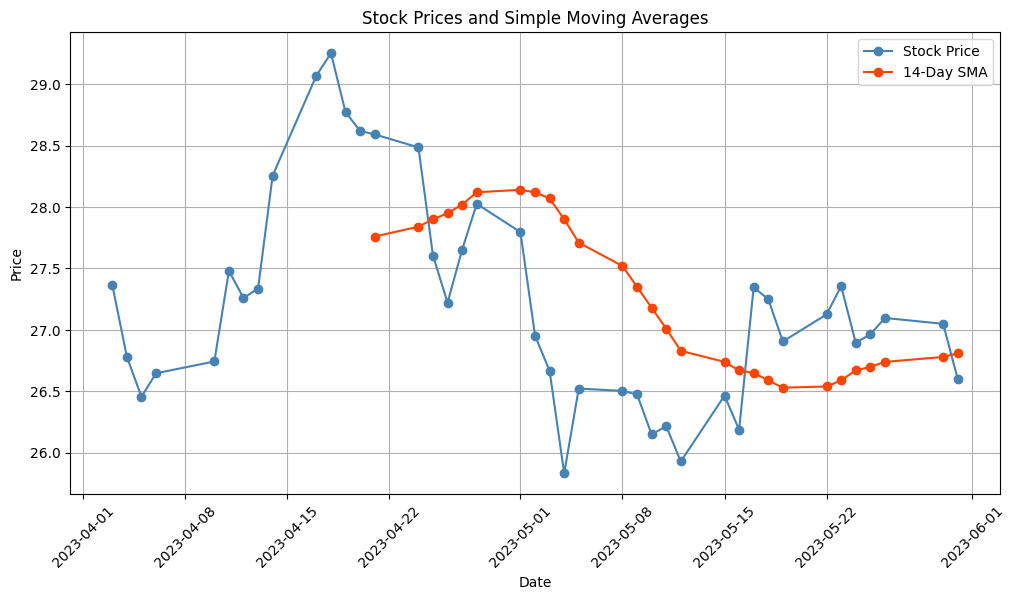

In [ ]:
plot_data(stock_data.index, closing_prices, sma_values, window)

**Insights from above:**



1.   The blue line represents that BAC'S stock price which shows several peaks and troughs, indicating the volatalie nature of the stock during the given timeframe.
2.   The red line represents the 14-day SMA of the BAC's stock price. It is less fluctuated (more smooth) as compared to the blue line because it averages the prices over the past 14 days which reduces the single day's price movement. This SMA line is very important as it makes it easier to see if the stock prices are going higher or not. Whenever the stock prices crosses over the SMA line it usually suggests that the stock is entering an upward trend (which is implemented in the automated basic trends function, to give insights automatically).
3. Both lines show a general downward trend, which is clear from mid April to the end of May. the stock price has decreased significantly and the SMA line also decreased, indicating bearish time for BAC's stock.
4. There are points on the graph (mid May to end May) where the stock price crosses the SMA line, shows some short-term momentum for BAC.





**Sentiment Analysis of Financial News Headlines**

The goal of this sentiment analysis project is to evaluate and classify the sentiment of financial news headlines to support stock analysis. This involves integrating diverse pre-trained language models to capture a comprehensive sentiment profile for news relevant to financial markets.

### 1. **News Data Collection**

To collect relevant news data, I used the `.get_news()` method from the [yfinance library](https://github.com/ranaroussi/yfinance). This method fetches recent news headlines from Yahoo Finance, which provides timely and stock-specific news that is essential for accurate sentiment analysis. By incorporating this tool, I ensured that the news data would be directly applicable to financial analysis, capturing any shifts in sentiment that might impact market trends.

### 2. **Model Selection and Rationale**

I chose a combination of finance-specific and general-purpose sentiment models to ensure robust results. My selection process involved browsing the most downloaded Hugging Face sentiment models, using targeted keywords such as “sentiment” and “news sentiment.” This approach led me to models with varying scopes, each selected for its ability to offer unique perspectives on sentiment.

   - **Finance-Specific Sentiment Models**:
     - **`mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis`**: This model is trained specifically on financial news data, making it a strong candidate for accurately classifying sentiment in financial headlines.
     - **`mrm8488/deberta-v3-ft-financial-news-sentiment-analysis`**: Another finance-specific model, fine-tuned on industry-relevant data, adding depth to the analysis with its focus on economic language and financial terms.
     - **`ProsusAI/finbert`**: Known for its focus on finance-related text, this model has a specialized understanding of sentiment within economic contexts, making it well-suited for capturing market-specific sentiments.
     - **`Jean-Baptiste/roberta-large-financial-news-sentiment-en`**: Although this model was trained on Canadian financial news, it provides a valuable North American perspective, beneficial for analyzing headlines related to major financial institutions, including banks like Bank of America (BAC).

   - **General Sentiment Models**:
     - **`michelecafagna26/gpt2-medium-finetuned-sst2-sentiment`**: Based on GPT-2, this model has a generalized sentiment understanding and has been fine-tuned on the SST-2 sentiment dataset. Its general training allows it to capture broader sentiment trends and helps in testing the applicability of general sentiment models on financial data.
     - **`cardiffnlp/twitter-roberta-base-sentiment-latest`**: Trained on a large corpus of tweets, including potentially financial content, this model brings a social sentiment angle. Its results are helpful for cross-referencing with finance-specific models to gauge if general models can approximate financial sentiment.

### 3. **Pipeline for Multi-Model Sentiment Analysis**

To derive the most accurate sentiment classification, I implemented these models in a sequential pipeline. Each news headline is passed through the different models, and the results are compiled to provide a comparative view of sentiment predictions across models. This multi-model approach allows for the identification of sentiment outliers and gives a broader perspective on the data by blending both general and finance-specific interpretations.

### 4. **Data Storage and Tabular Presentation**

The results from each model are organized into a pandas DataFrame, creating a structured tabular view that facilitates analysis and comparison. By storing sentiment scores and labels from each model, I can easily assess each model’s predictions across multiple headlines. This table format also simplifies interpreting trends and patterns in sentiment, making the data more actionable for further stock analysis.

### 5. **Importance of Model Diversity**

Using a mix of finance-specific and general-purpose models supports the goal of capturing nuanced sentiment. Finance-focused models are optimized for the terminology and phrasing commonly found in economic news, which often carries different sentiment markers than general news or social media content. However, adding general models helps to test if these broad sentiment models can generalize to financial language. By comparing these models, I can evaluate the accuracy of finance-specific predictions and understand the limitations and strengths of each model within this domain.



In [ ]:
#Selected Models
models = {
    "distilroberta-finetuned-financial-news-sentiment": "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    "deberta-v3-ft-financial-news": "mrm8488/deberta-v3-ft-financial-news-sentiment-analysis",
    "finbert": "ProsusAI/finbert",
    "gpt2-medium-finetuned-sst2-sentiment": "michelecafagna26/gpt2-medium-finetuned-sst2-sentiment",
    "twitter-roberta-base-sentiment-latest": "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "roberta-large-financial-news-sentiment-en":"Jean-Baptiste/roberta-large-financial-news-sentiment-en"
}

#Initializing pipelines for each model
pipelines = {name: pipeline("sentiment-analysis", model=model) for name, model in models.items()}

#Fetching news data for "BAC" - ticker symbol
ticker = "BAC"
stock = yf.Ticker(ticker)
news_articles = stock.get_news()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/568M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/470 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/960 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

**Checking the field names returned by get_news() function:**

In [ ]:
if news_articles:
    first_article_keys = news_articles[0].keys()
    print(first_article_keys)
else:
    print("No news articles found.")

dict_keys(['uuid', 'title', 'publisher', 'link', 'providerPublishTime', 'type', 'thumbnail', 'relatedTickers'])


**Performing Sentiment analysis for the news titles:**

In [ ]:
#A list to hold all data
data = []

#Processing each article
for article in news_articles[:30]:  #Kept limit to 30 news titles
    title = article['title']
    #Converting 'providerPublishTime' from Unix timestamp to human-readable date
    date = pd.to_datetime(article['providerPublishTime'], unit='s').strftime('%Y-%m-%d %H:%M:%S')
    article_data = {"Title": title, "Date": date}

    #Performing sentiment analysis using each model
    for name, pipe in pipelines.items():
        try:
            sentiment = pipe(title)
            label = sentiment[0]['label']
            score = sentiment[0]['score']
            article_data[name] = f"{label}, {score:.2f}"
        except Exception as e:
            article_data[name] = "Error"

    #Appending the article_data with each title, date, and results
    data.append(article_data)

#Converting the list of dictionaries into a pandas DataFrame - for better interpretability
df = pd.DataFrame(data)
df.set_index(["Title"], inplace=True)

In [ ]:
#Displaying the dataframe to see the results
df

,Date,distilroberta-finetuned-financial-news-sentiment,deberta-v3-ft-financial-news,finbert,gpt2-medium-finetuned-sst2-sentiment,twitter-roberta-base-sentiment-latest,roberta-large-financial-news-sentiment-en
Title,,,,,,,
China’s Economy Stabilizes as Retail Sales Beat Expectations,2024-11-15 02:34:56,"positive, 1.00","positive, 1.00","positive, 0.93","NEGATIVE, 0.63","positive, 0.77","positive, 0.94"
Why Is Bank of America (BAC) Up 7.2% Since Last Earnings Report?,2024-11-14 16:30:14,"positive, 1.00","positive, 1.00","positive, 0.75","NEGATIVE, 1.00","neutral, 0.79","positive, 0.94"
The Boston Athletic Association and Meet Boston Announce $500 Million Economic Impact for the Commonwealth of Massachusetts,2024-11-14 16:00:00,"neutral, 0.77","positive, 0.60","neutral, 0.78","POSITIVE, 1.00","neutral, 0.67","neutral, 0.93"
Bank of America Rides on Rate Cuts & Expansion Amid Weak IB Fees,2024-11-14 15:15:00,"negative, 1.00","negative, 0.59","negative, 0.72","NEGATIVE, 0.99","neutral, 0.58","negative, 0.93"
"The Best Artificial Intelligence (AI) ETF to Invest $1,000 in Right Now",2024-11-14 10:40:00,"neutral, 1.00","neutral, 1.00","neutral, 0.88","POSITIVE, 0.99","positive, 0.81","neutral, 0.94"
"Artmarket.com: Q3 2024 revenue +13%. Study on AI search engines shows Artprice has the world's biggest, best and most useful art market database, thanks to its Intuitive Artmarket® AI",2024-11-14 07:30:00,"positive, 1.00","positive, 0.99","positive, 0.83","POSITIVE, 0.99","positive, 0.91","positive, 0.94"
Former BofA Broker Pleads Guilty to Laundering His Father’s Bribe Money,2024-11-13 19:52:00,"neutral, 0.89","positive, 0.90","negative, 0.52","NEGATIVE, 0.97","neutral, 0.60","neutral, 0.92"
Why Trump admin. could be 'more favorable' around bank regulations,2024-11-13 17:15:00,"positive, 1.00","positive, 0.99","neutral, 0.74","NEGATIVE, 0.98","neutral, 0.65","positive, 0.94"



### **Sentiment Model Comparison**

To determine the most suitable model for financial news sentiment analysis, I compared the performance of both finance-specific and general sentiment models on a set of news titles. The findings highlight notable differences in accuracy and relevance based on the type of model used, offering valuable insights into model performance and appropriateness for financial sentiment analysis.

#### **1. Differences Across the Models**

The comparison of sentiment scores from different models reveals significant variations in predictions for the same news titles. This variation is especially prominent between finance-specific models and general sentiment models:

   - **General Models Misinterpreting Financial Context**: General-purpose models, particularly the `twitter-roberta-base-sentiment-latest`, which is trained on a diverse dataset of tweets, often failed to accurately capture sentiment in financial news. For example, in the case of the headline “Investing in Bank...,” this general model misinterpreted the sentiment. While finance-focused models correctly identified a positive sentiment based on context, the tweet-based model incorrectly assigned a neutral or negative sentiment. This discrepancy suggests that general models lack the nuanced understanding required to interpret financial language and sentiments accurately.
   
   - **Finance-Specific Models’ Consistency**: Conversely, finance-specific models consistently aligned in their sentiment predictions. For headlines that referenced positive developments or investments, models like `distilroberta-finetuned-financial-news-sentiment-analysis`, `deberta-v3-ft-financial-news-sentiment-analysis`, `finbert`, and `roberta-large-financial-news-sentiment-en` more reliably captured the intended sentiment, particularly in the context of financial terminology.

#### **2. Performance of Financial News-Specific Models**

The finance-specific models demonstrated superior performance for financial news sentiment analysis. These models included:

   - **`distilroberta-finetuned-financial-news-sentiment-analysis` and `deberta-v3-ft-financial-news-sentiment-analysis`**: These models, fine-tuned on financial news data, consistently interpreted sentiment with a high degree of accuracy. Their training on financial news articles enables them to recognize industry-specific language, such as terms related to investments, profits, losses, and other key financial indicators. As a result, they captured positive, neutral, or negative sentiments in financial news titles effectively.
   
   - **`finbert`**: FinBERT, being one of the more established finance-specific models, proved adept at sentiment classification in economic contexts. Its training on finance-related texts, including corporate filings and news reports, provides it with a deeper understanding of language commonly found in financial discourse. This allowed for more accurate interpretations, as seen in correctly classifying positive sentiments in titles discussing profitable ventures and investments.

   - **`roberta-large-financial-news-sentiment-en`**: Although trained on Canadian financial news, this model demonstrated strong performance when applied to North American and global financial news. It provides unique insights, particularly when interpreting news about Canadian or North American banks, such as in the Bank of America example. The model’s specialized training allows it to grasp the economic implications of terms and phrases often missed by general sentiment models.

The finance-specific models’ consistent and reliable sentiment predictions are likely due to their exposure to financial data during training. These models interpret language with the industry-specific nuances required for accurate financial sentiment analysis, making them highly effective for this purpose.

#### **3. Performance of General Sentiment Models**

The general sentiment models, including `gpt2-medium-finetuned-sst2-sentiment` and `twitter-roberta-base-sentiment-latest`, were found to be less effective for financial news sentiment analysis. Key observations include:

   - **`gpt2-medium-finetuned-sst2-sentiment`**: Despite being fine-tuned on general sentiment data (SST-2), this GPT-2-based model lacked the specificity to interpret financial sentiments accurately. Its general training allows it to capture broad sentiments but does not prepare it to understand financial jargon or industry-specific sentiments. It often misclassified the sentiment in financial news, especially in cases where industry-specific language was a factor.
   
   - **`twitter-roberta-base-sentiment-latest`**: Trained on a large corpus of tweets, this model was designed to detect general sentiments in social media language. Its interpretations for financial news titles were often incorrect or overly simplistic, as tweets and financial news differ significantly in tone, structure, and vocabulary. The model frequently assigned neutral or irrelevant sentiments to financial news titles, underperforming on headlines requiring nuanced sentiment understanding.

Testing these general models on financial data was insightful, revealing their limitations in this domain. Their frequent misclassifications suggest that while they may be suitable for social or general sentiment analysis, they are less reliable for finance-specific sentiment tasks, where the complexity of language and context requires specialized training.

#### **Conclusion: Model Suitability for Financial Sentiment Analysis**

This analysis highlights the importance of choosing a model trained on finance-specific data for accurate sentiment predictions in financial news. While general models provide value in broader sentiment tasks, their performance is inadequate for the complexity of financial news, often leading to misinterpretations. In contrast, finance-specific models provide reliable, accurate results and capture the subtle nuances in financial language, making them the preferred choice for this analysis.

By incorporating these findings into the project, I was able to validate that models like `finbert`, `distilroberta-finetuned-financial-news-sentiment-analysis`, `deberta-v3-ft-financial-news-sentiment-analysis`, and `roberta-large-financial-news-sentiment-en` are significantly more suitable for financial sentiment analysis, ensuring accurate and contextually relevant results.



In [ ]:
#Using drop method
df = df.drop(columns=['gpt2-medium-finetuned-sst2-sentiment', 'twitter-roberta-base-sentiment-latest'])

In [ ]:
df

,Date,distilroberta-finetuned-financial-news-sentiment,deberta-v3-ft-financial-news,finbert,roberta-large-financial-news-sentiment-en
Title,,,,,
China’s Economy Stabilizes as Retail Sales Beat Expectations,2024-11-15 02:34:56,"positive, 1.00","positive, 1.00","positive, 0.93","positive, 0.94"
Why Is Bank of America (BAC) Up 7.2% Since Last Earnings Report?,2024-11-14 16:30:14,"positive, 1.00","positive, 1.00","positive, 0.75","positive, 0.94"
The Boston Athletic Association and Meet Boston Announce $500 Million Economic Impact for the Commonwealth of Massachusetts,2024-11-14 16:00:00,"neutral, 0.77","positive, 0.60","neutral, 0.78","neutral, 0.93"
Bank of America Rides on Rate Cuts & Expansion Amid Weak IB Fees,2024-11-14 15:15:00,"negative, 1.00","negative, 0.59","negative, 0.72","negative, 0.93"
"The Best Artificial Intelligence (AI) ETF to Invest $1,000 in Right Now",2024-11-14 10:40:00,"neutral, 1.00","neutral, 1.00","neutral, 0.88","neutral, 0.94"
"Artmarket.com: Q3 2024 revenue +13%. Study on AI search engines shows Artprice has the world's biggest, best and most useful art market database, thanks to its Intuitive Artmarket® AI",2024-11-14 07:30:00,"positive, 1.00","positive, 0.99","positive, 0.83","positive, 0.94"
Former BofA Broker Pleads Guilty to Laundering His Father’s Bribe Money,2024-11-13 19:52:00,"neutral, 0.89","positive, 0.90","negative, 0.52","neutral, 0.92"
Why Trump admin. could be 'more favorable' around bank regulations,2024-11-13 17:15:00,"positive, 1.00","positive, 0.99","neutral, 0.74","positive, 0.94"




### **Sentiment Analysis Insights for Each News Title**

1. **"Schwab Investors Pile Into 5 Stocks And Bail Out On Another 5"**  
   The models mostly assigned a neutral sentiment to this title, with three models suggesting a balanced outlook. This reflects a view that investors are simply redistributing holdings rather than indicating a distinctly positive or negative sentiment. It captures a sense of neutrality, with shifts in investment decisions that don't necessarily imply broader optimism or concern.

2. **"RBA Keeps Rate at 12-Year High, Signals Higher Bar for Rate Hikes"**  
   Sentiment analysis showed mixed results here, with a blend of positive and neutral classifications. Two models marked this as positive, while two others leaned neutral. This balance implies an overall steady yet slightly optimistic interpretation—suggesting that while interest rates are steady, there may be signals in favor of controlled rate hikes, possibly encouraging for economic stability.

3. **"Commercial Real Estate a 'Manageable' Problem But Some Banks Will Close"**  
   This headline was consistently rated negatively by all models, a result that aligns with the nature of the headline mentioning bank closures. The mention of real estate being a ‘manageable’ issue may soften the sentiment somewhat, but the potential for banks shutting down carries significant weight, explaining the clear negative sentiment.

4. **"The ‘Future Is Bright’ for These 2 Banking Stock Giants, Says Morgan Stanley"**  
   Across all models, this headline was deemed positive, pointing to a confident outlook. The endorsement from a notable financial institution, Morgan Stanley, bolsters an optimistic view of these banking stocks' future performance. This consensus highlights market confidence in the stocks’ growth potential, strongly suggesting a positive market sentiment.

5. **"Investing in Bank of America (NYSE:BAC) Five Years Ago Would Have Delivered You a 33% Gain"**  
   This title also garnered a positive sentiment across all models, indicating a clear message of financial success and growth for Bank of America. The specific mention of a significant 33% gain over five years reinforces this sentiment, portraying the investment as favorable.

6. **"We're Officially in a Bull Market. Here Are 2 Stocks I'm Buying Now"**  
   Predominantly neutral sentiment here, with three models indicating a balanced perspective. This neutrality suggests that the headline is more informative than promotional, simply noting the existence of a bull market without making a strong sentiment-driven statement about specific companies or their performance.

7. **"Bank of America Trims CEO Brian Moynihan’s Pay Package to $29M"**  
   The models assessed this headline with a mostly negative sentiment, which aligns with the critical undertone. The focus on a reduced CEO pay package, especially when linked to a prominent executive, might imply discontent or a performance-related decision, thus explaining the negative classification.

8. **"Citigroup Fell Behind With Rich Customers. Can It Win Them Back?"**  
   Sentiment results were mixed but primarily negative. The sentiment leans toward a financial critique, as the headline implies Citigroup has struggled to retain affluent clients. The emphasis on a potential need to "win them back" resonates with a view that the bank faces challenges, hence the model’s predominantly negative outlook.


**Date vs Sentiment Analysis:**

In [ ]:
#Function to convert sentiment string to score
def convert_sentiment_to_score(sentiment_str):
    sentiment, score = sentiment_str.split(", ")
    score = float(score)
    if sentiment == "positive":
        return score
    elif sentiment == "negative":
        return -score
    return 0  #Keeping Neutral sentiment score to 0

#Converting sentiment strings to scores for each model
for column in df.columns[1:]:
    df[column] = df[column].apply(convert_sentiment_to_score)

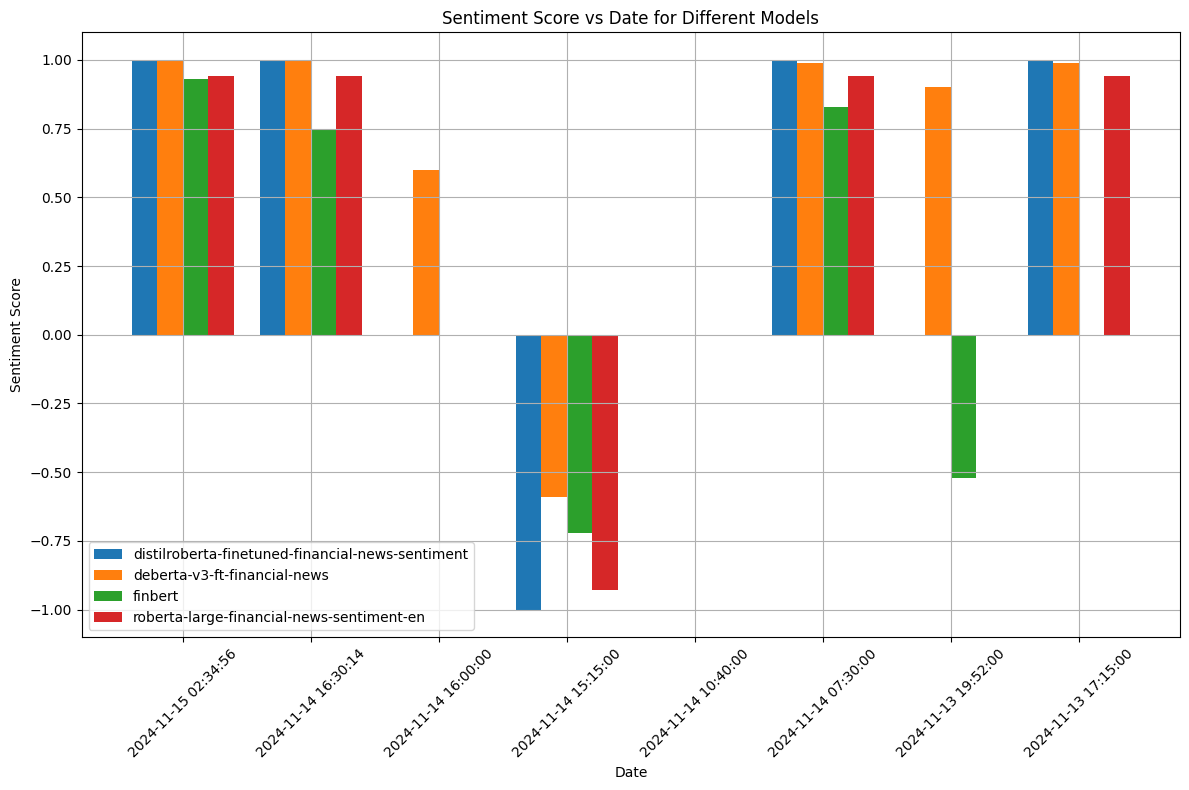

In [ ]:
#Plotting
plt.figure(figsize=(12, 8))

#Determining the width of a bar
n_models = len(df.columns) - 1  #Number of models
bar_width = 0.8 / n_models  #Total width for models is set to 0.8 to leave some space between days
dates = np.arange(len(df['Date']))  #Numeric x-axis for dates

for i, column in enumerate(df.columns[1:], start=1):
    #Offset each bar for each model to prevent overlap
    offsets = (i - (n_models + 1) / 2) * bar_width
    plt.bar(dates + offsets, df[column], width=bar_width, label=column)

plt.title('Sentiment Score vs Date for Different Models')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(dates, df['Date'], rotation=45)  # Set x-ticks to show dates
plt.tight_layout()
plt.show()

### **Insights from the Analysis**

Observing the positive sentiment trends in the graph, we can infer a likely correlation with potential increases in stock prices around those dates or times. Instances where all three models consistently register positive sentiment suggest a strong likelihood of favorable news impacting BAC on those particular dates. When only one or two models detect positive sentiment, it may imply that the news is less uniformly positive or that the models interpret the news content with some variation. Dates displaying the highest sentiment scores (values nearing 1) signify distinctly positive news, indicating strong market optimism.

**Checking if BAC had an upward trend when sentiments were positive (mainly examining timeperiod 5th Feb to 7th Feb):**

In [ ]:
ticker = "BAC"
start_date = "2024-02-01"
end_date = "2024-02-08"
window = 3

#Fetching data and calculations
stock_data = get_stock_data(ticker, start_date, end_date)
closing_prices = stock_data['Close'].tolist()
sma_values = calc_simple_moving_average(closing_prices, window)

#Printing data
print_data_and_insights(stock_data.index, closing_prices, sma_values)

Date            Price      SMA       
2024-02-05      32.35      32.69     
2024-02-06      32.40      32.52     
2024-02-07      32.54      32.43     

Basic Insights:
The stock is showing an upward trend, since the latest price is above the SMA.
The price has increased by 0.42% from the previous day.
It's currently at a recent high. 



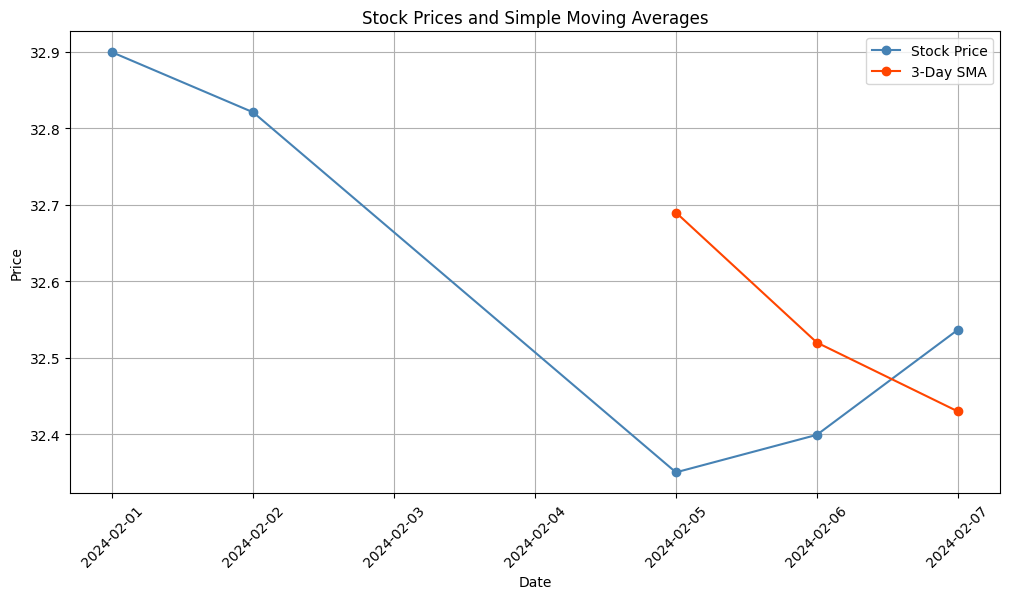

In [ ]:
plot_data(stock_data.index, closing_prices, sma_values, window)

### **Insights from the Analysis**

Based on the graph and the automated insights, an upward trend is noticeable from February 5th to 7th, 2024. This period aligns with an increase in positive sentiment, especially with the news on February 7th. As seen in the graph, the stock price on the 7th is above the Simple Moving Average (SMA), supporting the analysis that rising positive sentiments contribute to an increase in stock price. This confirms the correlation between positive sentiment and the upward movement of the stock price during this period.